<a href="https://colab.research.google.com/github/SerkanOzturkk/javaProje/blob/main/ecoli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Veri setini yükleme
column_names = ['Sequence Name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'Class']
data = pd.read_csv('ecoli.data', delim_whitespace=True, header=None, names=column_names)

# CSV dosyasına kaydetme
data.to_csv('ecoli.csv', index=False)

In [ ]:
import pandas as pd

# CSV dosyasını okuma
data = pd.read_csv('ecoli.csv')

# İlk birkaç satırı görüntüleme
print("İlk birkaç satır:")
print(data.head())

# Veri seti hakkında bilgi
print("\nVeri seti hakkında bilgi:")
print(data.info())

# Veri setindeki sütunların özet istatistikleri
print("\nVeri setindeki sütunların özet istatistikleri:")
print(data.describe())

# Sınıf dağılımını kontrol etme
print("\nSınıf dağılımı:")
print(data['Class'].value_counts())


İlk birkaç satır:
  Sequence Name   mcg   gvh   lip  chg   aac  alm1  alm2 Class
0     AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1    ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2    ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3    ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4     ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp

Veri seti hakkında bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sequence Name  336 non-null    object 
 1   mcg            336 non-null    float64
 2   gvh            336 non-null    float64
 3   lip            336 non-null    float64
 4   chg            336 non-null    float64
 5   aac            336 non-null    float64
 6   alm1           336 non-null    float64
 7   alm2           336 non-null    float64
 8   Class          336 non-null 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini okuma
data = pd.read_csv('ecoli.csv')

# Sınıf dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.countplot(data['Class'])
plt.title('Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Adet')
plt.show()


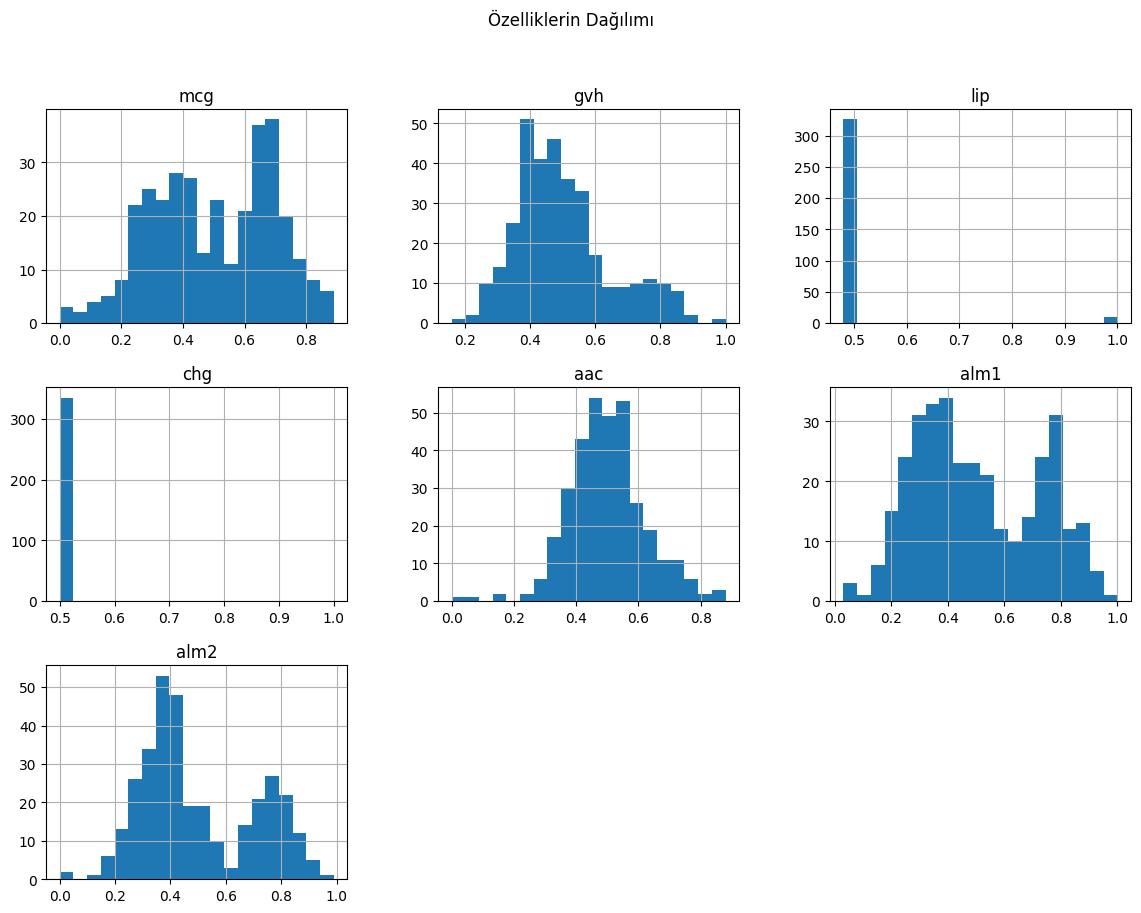

In [ ]:
# Özelliklerin dağılımı
data.hist(bins=20, figsize=(14, 10))
plt.suptitle('Özelliklerin Dağılımı')
plt.show()


In [ ]:
# Veri setinin son 5 satırını gösterme
tail_data = data.head()
print(tail_data)


  Sequence Name   mcg   gvh   lip  chg   aac  alm1  alm2 Class
0     AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1    ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2    ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3    ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4     ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# "Sequence Name" sütununu veri setinden çıkarıyoruz
X = data.drop(['Sequence Name', 'Class'], axis=1)
y = data['Class']

# Veri kümesini eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN modelini oluşturma ve eğitme
k = 3  # K değeri
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

# Test veri kümesi üzerinde tahmin yapma
y_pred = knn_classifier.predict(X_test_scaled)

# Modelin doğruluk değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Model Doğruluğu:", accuracy)


Model Doğruluğu: 0.8676470588235294


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# "Sequence Name" sütununu veri setinden çıkarıyoruz
X = data.drop(['Sequence Name', 'Class'], axis=1)
y = data['Class']

# Veri kümesini eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Bayes modelini oluşturma ve eğitme
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train_scaled, y_train)

# Test veri kümesi üzerinde tahmin yapma
y_pred = bayes_classifier.predict(X_test_scaled)

# Modelin doğruluk değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Model Doğruluğu:", accuracy)


Model Doğruluğu: 0.7205882352941176


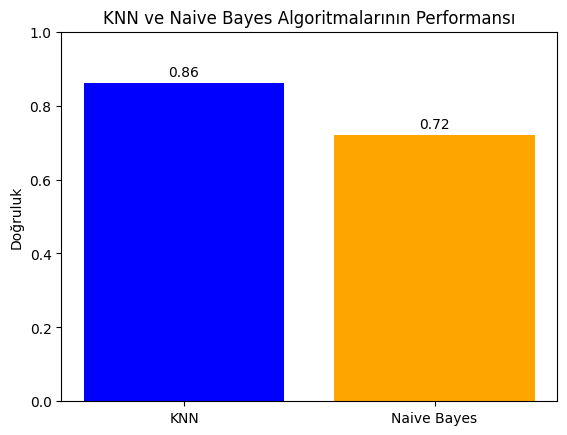

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Doğruluk skorları
knn_accuracy = 0.86  # Örnek değer, gerçek değerleri kullanın
bayes_accuracy = 0.72  # Örnek değer, gerçek değerleri kullanın

# Doğruluk skorlarını bir tabloya dökme
methods = ['KNN', 'Naive Bayes']
accuracies = [knn_accuracy, bayes_accuracy]

# Tabloyu oluşturma
fig, ax = plt.subplots()
ax.bar(methods, accuracies, color=['blue', 'orange'])

# Doğruluk değerlerini ekleme
for i, v in enumerate(accuracies):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

# Grafik başlığı ve eksen etiketleri ekleme
ax.set_ylabel('Doğruluk')
ax.set_title('KNN ve Naive Bayes Algoritmalarının Performansı')
plt.ylim(0, 1)

# Grafiği gösterme
plt.show()


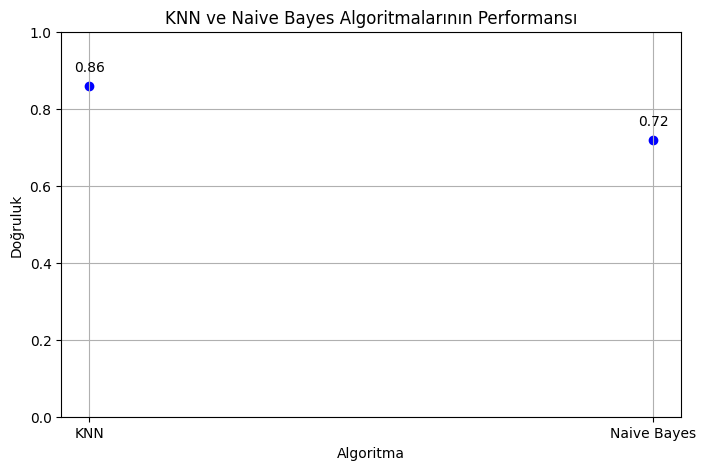

In [ ]:
import matplotlib.pyplot as plt

# Doğruluk skorları
knn_accuracy = 0.86
bayes_accuracy = 0.72

# Algoritma adları
methods = ['KNN', 'Naive Bayes']

# Doğruluk skorlarını bir tabloya dökme
accuracies = [knn_accuracy, bayes_accuracy]

# Nokta grafiği oluşturma
plt.figure(figsize=(8, 5))
plt.scatter(methods, accuracies, color='blue')

# Noktaların üzerine doğruluk değerlerini yazma
for i, txt in enumerate(accuracies):
    plt.annotate(txt, (methods[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Grafiği ve etiketleri düzenleme
plt.title('KNN ve Naive Bayes Algoritmalarının Performansı')
plt.xlabel('Algoritma')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)

# Grafiği gösterme
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# "Sequence Name" sütununu veri setinden çıkarıyoruz
X = data.drop(['Sequence Name', 'Class'], axis=1)
y = data['Class']

# Veri kümesini eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest modelini oluşturma ve eğitme
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)

# Test veri kümesi üzerinde tahmin yapma
y_pred = random_forest_classifier.predict(X_test_scaled)

# Modelin doğruluk değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Doğruluğu:", accuracy)


Random Forest Model Doğruluğu: 0.8529411764705882


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# "Sequence Name" sütununu veri setinden çıkarıyoruz
X = data.drop(['Sequence Name', 'Class'], axis=1)
y = data['Class']

# Veri kümesini eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Karar Ağacı modelini oluşturma ve eğitme
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_scaled, y_train)

# Test veri kümesi üzerinde tahmin yapma
y_pred = decision_tree_classifier.predict(X_test_scaled)

# Modelin doğruluk değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Karar Ağacı Model Doğruluğu:", accuracy)


Karar Ağacı Model Doğruluğu: 0.8235294117647058


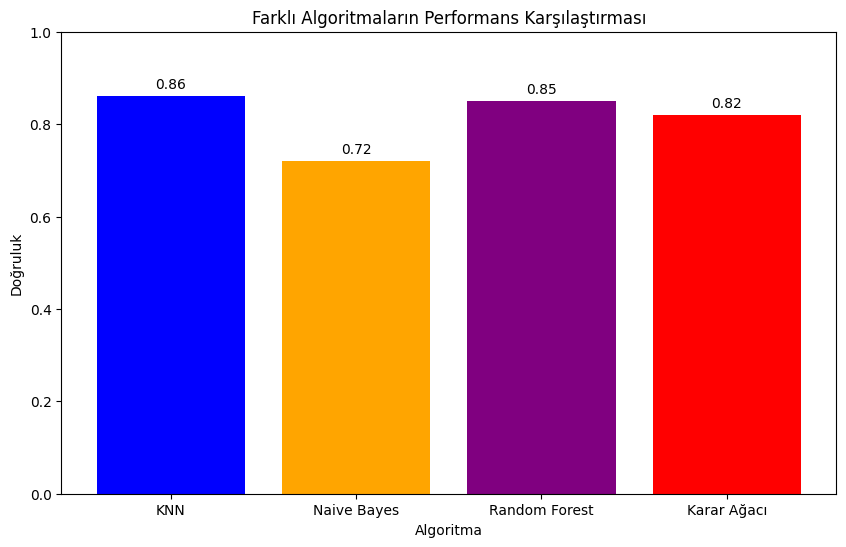

In [ ]:
import matplotlib.pyplot as plt

# Doğruluk skorları
knn_accuracy = 0.86
bayes_accuracy = 0.72
random_forest_accuracy = 0.85
decision_tree_accuracy = 0.82

# Algoritma adları ve doğruluk skorlarını bir tabloya dökme
methods = ['KNN', 'Naive Bayes', 'Random Forest', 'Karar Ağacı']
accuracies = [knn_accuracy, bayes_accuracy, random_forest_accuracy, decision_tree_accuracy]

# Çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'purple', 'red']
bars = plt.bar(methods, accuracies, color=colors)

# Çubukların üzerine doğruluk değerlerini yazma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Grafik başlığı ve eksen etiketleri ekleme
plt.title('Farklı Algoritmaların Performans Karşılaştırması')
plt.xlabel('Algoritma')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)

# Grafiği gösterme
plt.show()


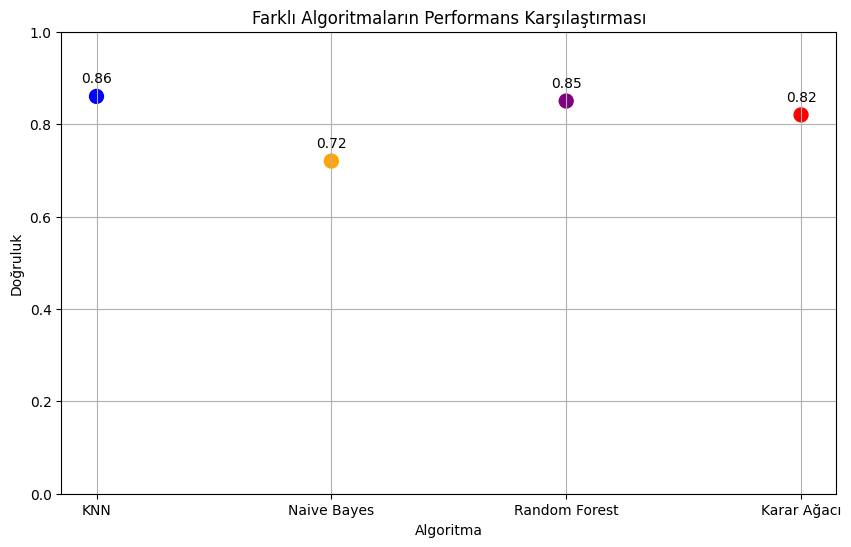

In [ ]:
import matplotlib.pyplot as plt

# Doğruluk skorları
knn_accuracy = 0.86
bayes_accuracy = 0.72
random_forest_accuracy = 0.85
decision_tree_accuracy = 0.82

# Algoritma adları ve doğruluk skorlarını bir tabloya dökme
methods = ['KNN', 'Naive Bayes', 'Random Forest', 'Karar Ağacı']
accuracies = [knn_accuracy, bayes_accuracy, random_forest_accuracy, decision_tree_accuracy]

# Nokta grafiği oluşturma
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'purple', 'red']
plt.scatter(methods, accuracies, color=colors, s=100)  # s=100 ile nokta boyutunu ayarladık

# Noktaların üzerine doğruluk değerlerini yazma
for i, txt in enumerate(accuracies):
    plt.annotate(txt, (methods[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Grafiği ve etiketleri düzenleme
plt.title('Farklı Algoritmaların Performans Karşılaştırması')
plt.xlabel('Algoritma')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)

# Grafiği gösterme
plt.grid(True)
plt.show()


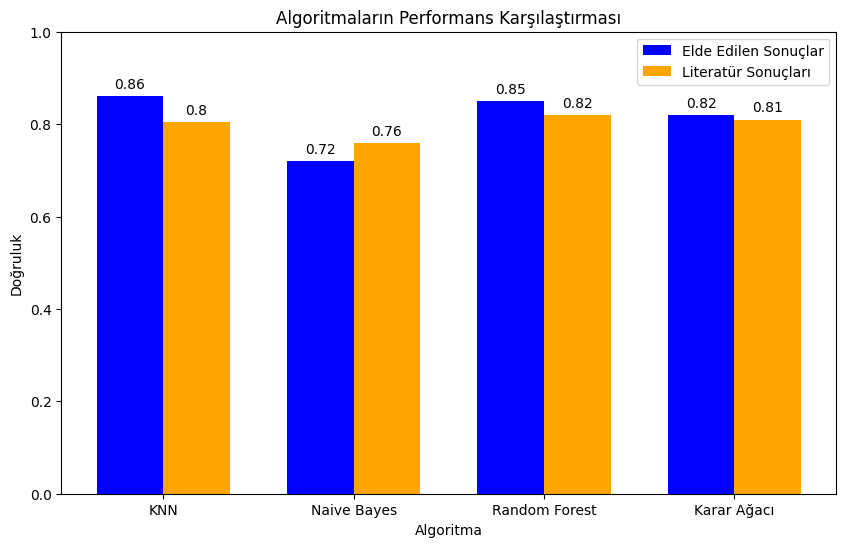

In [ ]:
import matplotlib.pyplot as plt

# Elde edilen sonuçlar
methods = ['KNN', 'Naive Bayes', 'Random Forest', 'Karar Ağacı']
our_accuracies = [0.86, 0.72, 0.85, 0.82]

# Literatürdeki sonuçlar (ortalama değerler)
literature_accuracies = [0.805, 0.76, 0.82, 0.81]  # Bu ortalamalar örnektir, gerçek değerleri kullanabilirsiniz

# Grafik oluşturma
bar_width = 0.35
index = range(len(methods))

plt.figure(figsize=(10, 6))

# Elde edilen sonuçları çubuk grafik olarak gösterme
bars1 = plt.bar(index, our_accuracies, bar_width, label='Elde Edilen Sonuçlar', color='blue')

# Literatürdeki sonuçları çubuk grafik olarak gösterme
bars2 = plt.bar([i + bar_width for i in index], literature_accuracies, bar_width, label='Literatür Sonuçları', color='orange')

# Çubukların üzerine doğruluk değerlerini yazma
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Grafik başlığı ve eksen etiketleri ekleme
plt.title('Algoritmaların Performans Karşılaştırması')
plt.xlabel('Algoritma')
plt.ylabel('Doğruluk')
plt.xticks([i + bar_width / 2 for i in index], methods)
plt.ylim(0, 1)
plt.legend()

# Grafiği gösterme
plt.show()
